In [1]:
from delayed_paper import *
plt.style.use(['dark_background'])

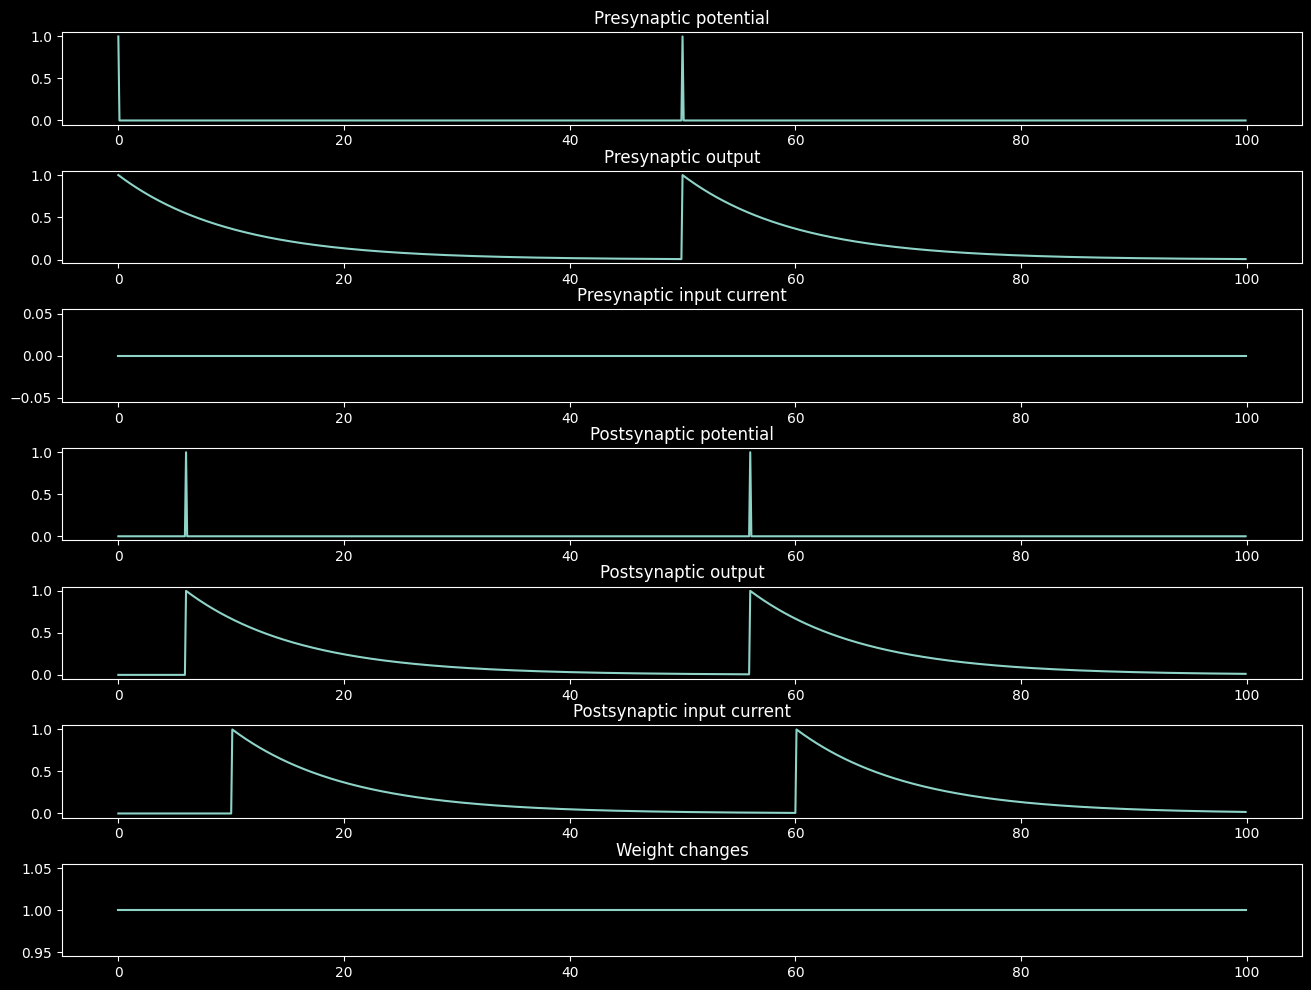

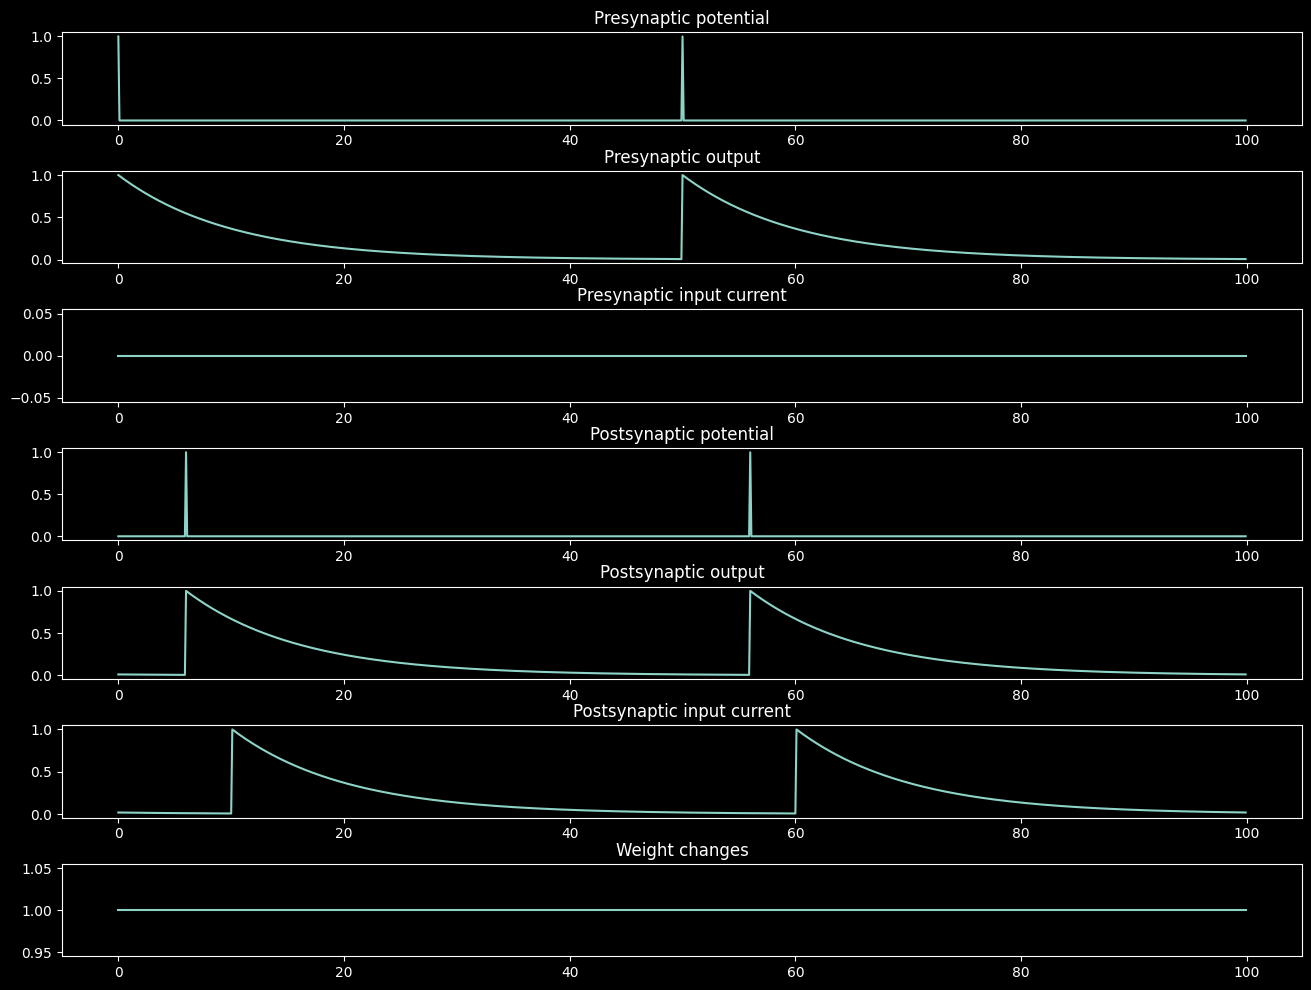

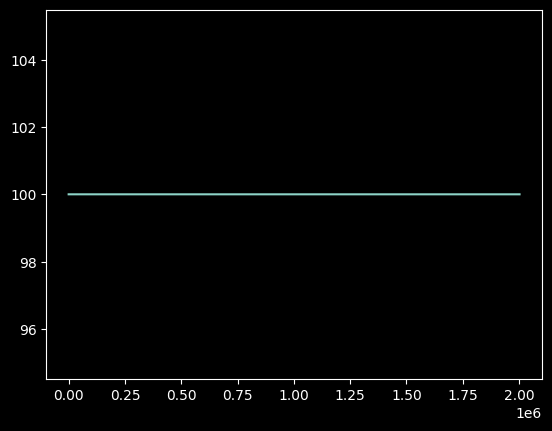

In [2]:
model_11 = exp11()
model_11.show_config()
model_11.set_noise(10)
model_11.set_d_lr(0)
delay_all = []
model_11, delay, dd = protocol_11(model_11)
delay_all += delay
model_11, delay, dd = protocol_11(model_11, time=200000, plot=False)
delay_all += delay
model_11, delay, dd = protocol_11(model_11)
delay_all += delay
plt.plot(delay_all)

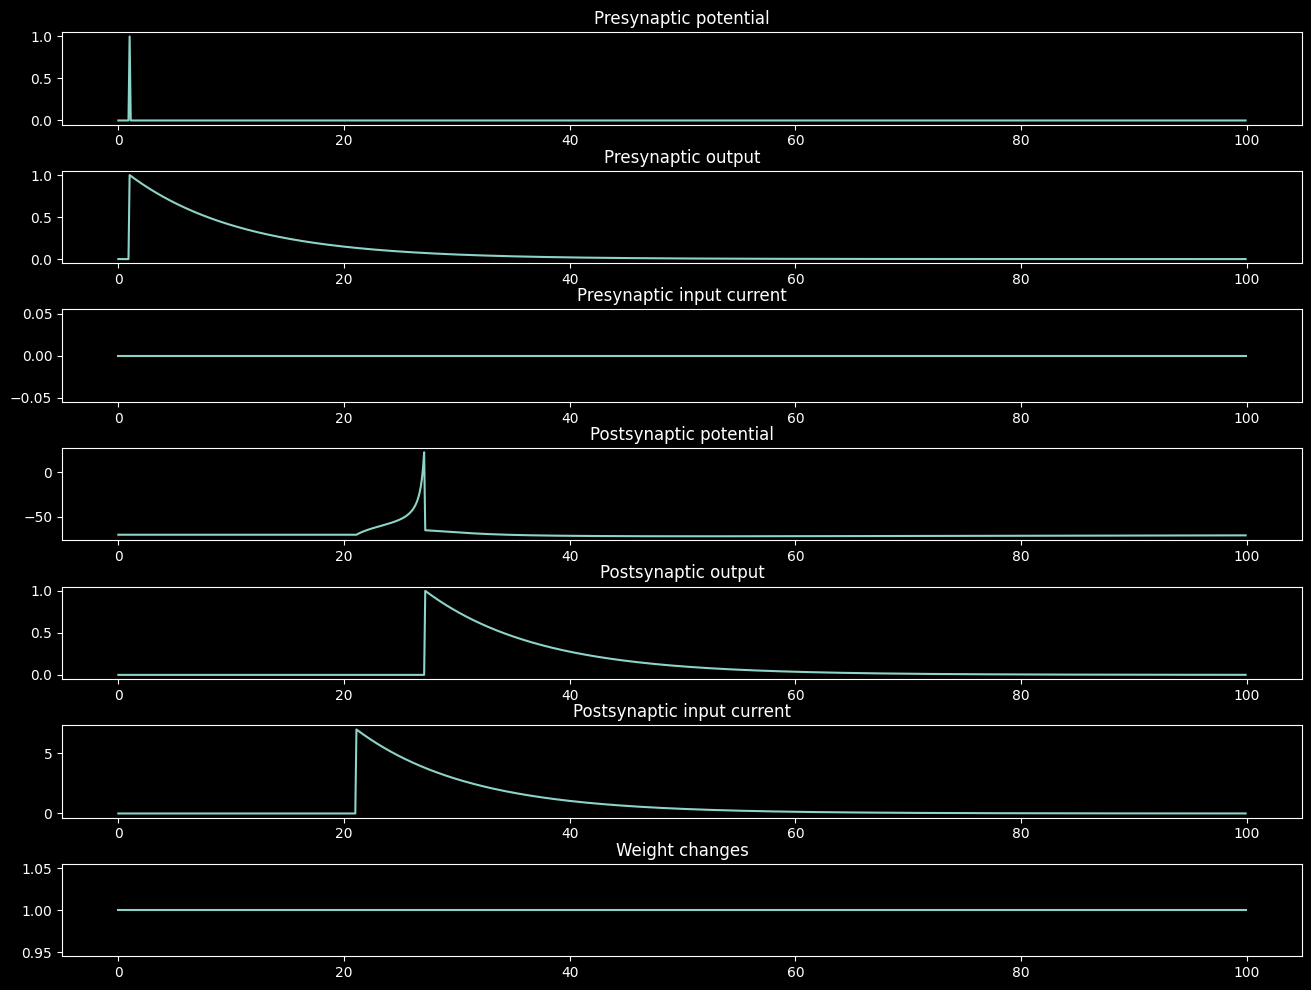

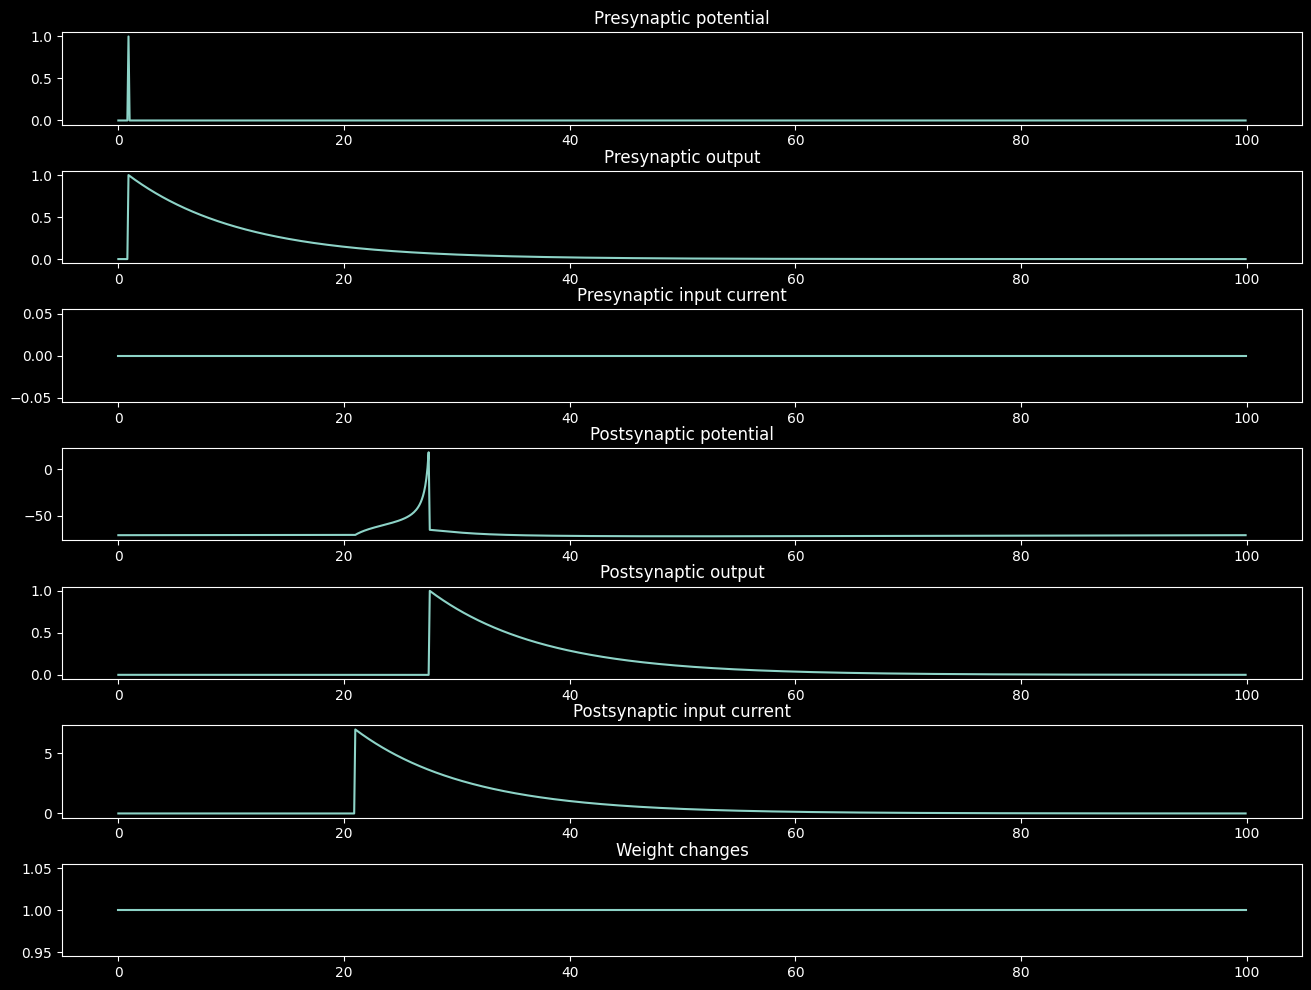

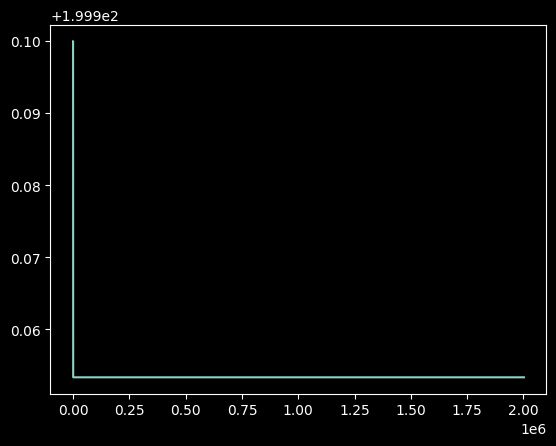

In [3]:
model_12 = exp12()
model_12.show_config()
model_12.set_noise(0)
delay_all = []
model_11, delay, dd = protocol_12(model_12)
delay_all += delay
model_11, delay, dd = protocol_12(model_12, time=200000, plot=False)
delay_all += delay
model_11, delay, dd = protocol_12(model_12)
delay_all += delay
plt.plot(delay_all)

In [4]:
patterns, num_inputs, num_patterns = sampler(num_inputs=10, num_rand_patterns=10)
patterns, num_inputs, num_patterns

({0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  1: [9, 2, 6, 1, 8, 3, 10, 5, 4, 7],
  2: [1, 2, 9, 6, 4, 5, 8, 10, 7, 3],
  3: [10, 3, 1, 7, 9, 6, 4, 8, 2, 5],
  4: [2, 8, 7, 3, 9, 1, 4, 5, 6, 10],
  5: [2, 6, 5, 9, 1, 8, 7, 4, 3, 10],
  6: [9, 3, 6, 8, 4, 2, 10, 1, 5, 7],
  7: [1, 6, 3, 7, 4, 8, 5, 2, 9, 10],
  8: [5, 9, 2, 4, 1, 6, 3, 10, 8, 7],
  9: [3, 1, 5, 10, 9, 7, 8, 6, 2, 4],
  10: [5, 3, 8, 1, 7, 4, 6, 9, 10, 2]},
 10,
 11)

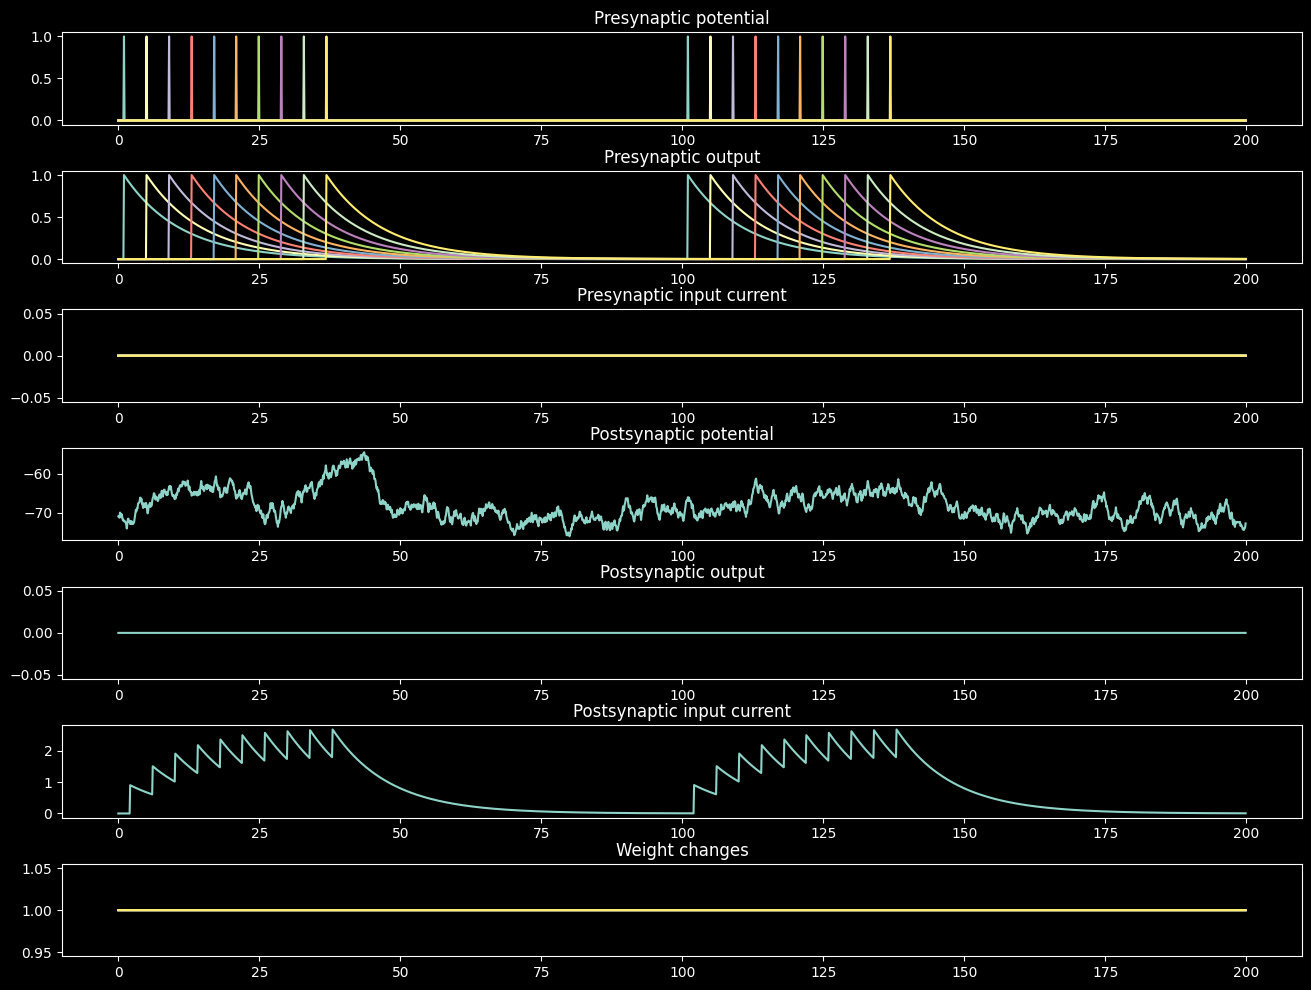

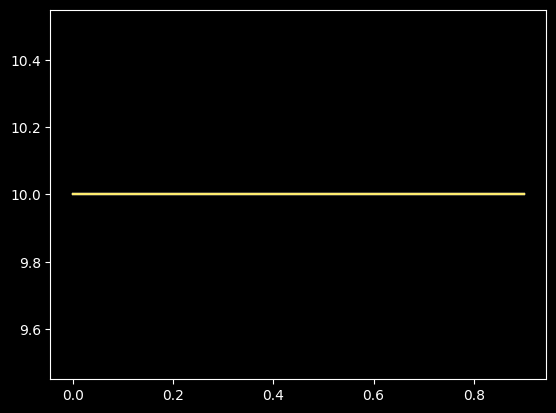

[4018]


In [5]:
model_21 = exp21(sc=.9, num_inputs=num_inputs, b=7)
model_21.show_config()
model_21.set_noise(1.3)
sample_time = 100
interval = 4
model_21, delay, dd, num_spikes = run_protocol(model_21, sampler=[patterns[0]], sample_time=sample_time, interval=interval, runs=2, lr=.1, d_lr=.1,
                 freeze_delays=True, gather_data=True, plot=True, plast_type=None, return_gatherer=False)
model_21, delay, dd, num_spikes = run_protocol(model_21, sampler=[patterns[0]], sample_time=sample_time, interval=interval, runs=5000, lr=1, d_lr=1,
                 freeze_delays=False, gather_data=False, plot=True, plast_type=None, return_gatherer=False)
plt.figure()
if delay.size > 0:
    for i in range(len(model_21.neurons)-1):
        plt.plot(np.array(range(len(delay[i])))*.1, delay[i])
    plt.show()

print(num_spikes)

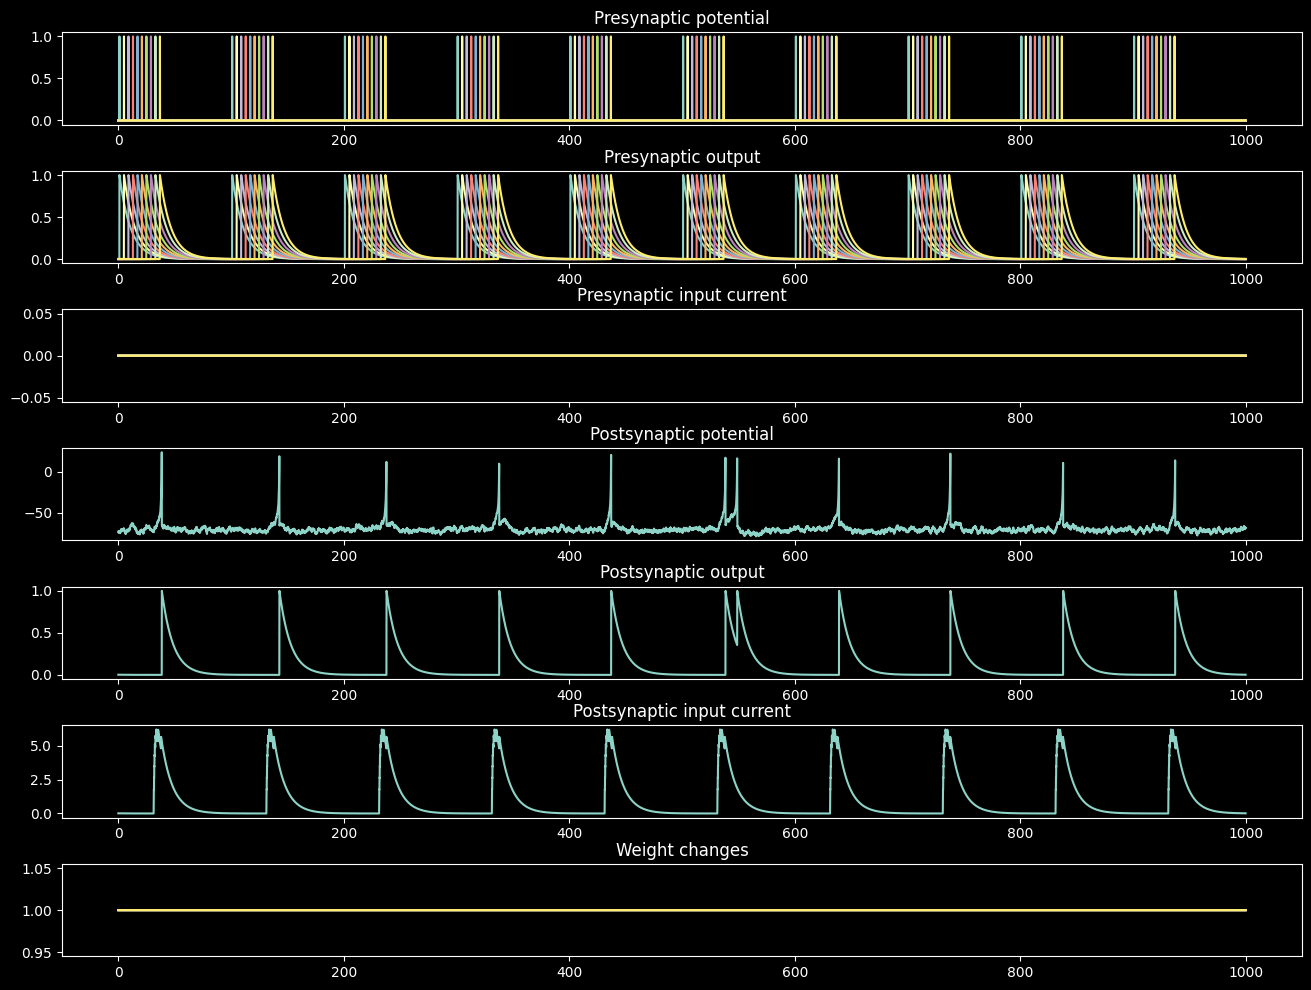

[11  0  0  0  0  0  0  0  0  0  0]


In [6]:
model_21, delay, dd, num_spikes = run_protocol(model_21, sampler=patterns, sample_time=sample_time, interval=interval, runs=10, lr=.1, d_lr=1,
                 freeze_delays=True, gather_data=True, plot=True, plast_type=None, return_gatherer=False)
print(num_spikes)

In [7]:
def b_dependence(ranges_b=(0, 20, 1), sample_time=100, interval=3, runs_train=5000,
                 runs_test=10, scale=.7, noise=1.3, d_lr=1):
    spikes = []
    delays = [[] for i in range(ranges_b[0], ranges_b[1], ranges_b[2])]
    b = np.arange(ranges_b[0], ranges_b[1], ranges_b[2])
    for i in b:
        print('checking b = ', i)
        model_21 = exp21(sc=scale, num_inputs=num_inputs, b=i)
        model_21.set_noise(noise)
        model_21, delay, dd, num_spikes = run_protocol(model_21, sampler=[patterns[0]],
                                                       sample_time=sample_time, interval=interval, runs=runs_train, lr=1, d_lr=d_lr, 
                                                       freeze_delays=False, gather_data=False, plot=False, plast_type=None, return_gatherer=False)
        
        model_21, delay, dd, num_spikes = run_protocol(model_21, sampler=patterns,
                                                       sample_time=sample_time, interval=interval, runs=runs_test, lr=.1, d_lr=1,
                                                       freeze_delays=True, gather_data=True, plot=False, plast_type=None, return_gatherer=False)
        for j in model_21.syn_by_edge.values():
            delays[i].append(j.delay)
        spikes.append(num_spikes)
        print(spikes[i], delays[i])
    return np.array(spikes), np.array(delays), f'st{sample_time}_int{interval}_tr{runs_train}_te{runs_test}_sc{scale}_noise{noise}_b{ranges_b}'

In [8]:
spikes, delays, hparams = b_dependence(ranges_b=(0, 20, 1), sample_time=100, interval=4, runs_train=5000,
                 runs_test=100, scale=.9, noise=1.3, d_lr=1)
print(hparams)
spikes, delays

checking b =  0
[18  0  0  0  0  0  0  0  0  0  0] [45.86081745621677, 64.7362338195535, 90.35708289091656, 119.00537814911878, 144.77823195763028, 165.72141725500808, 183.74732992025477, 189.63378657659786, 180.18400306122336, 159.18787897599276]
checking b =  1
[14  0  0  0  0  0  0  0  0  0  0] [47.558923561099185, 67.29988772249385, 93.646632884064, 124.21394630275188, 153.817200678978, 180.36303056953523, 199.89596862616628, 202.10056847487724, 186.49731782688792, 161.3551098470107]
checking b =  2
[25  0  0  0  0  0  0  0  0  0  0] [54.87911992323511, 77.60001927048823, 105.62402680932205, 134.06304482894217, 163.10001498308938, 194.18893878837258, 215.10015948893079, 212.60936376196338, 191.8152896545802, 163.11804434895743]
checking b =  3
[25  0  0  0  0  0  0  0  0  0  0] [52.55780066114445, 75.66690009154081, 107.13345162536562, 146.786202093463, 195.56926121223472, 248.18272865377497, 264.8308437609619, 247.47946615208934, 217.79360762599995, 184.37968524059534]
checking b 

(array([[ 18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 36,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 72,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 98,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [102,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [101,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 94,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 89,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 86,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 87,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 82,   0,   0,  

In [9]:
import os
spikes = np.array(spikes)
delays = np.array(delays)
spikes.shape
if not os.path.exists('C:/Users/iamkg0/Desktop/projects/rustyspikes/Prototype/logs/' + hparams):
    os.makedirs('C:/Users/iamkg0/Desktop/projects/rustyspikes/Prototype/logs/' + hparams)
np.save('C:/Users/iamkg0/Desktop/projects/rustyspikes/Prototype/logs/' + hparams + '/delays', delays)
np.save('C:/Users/iamkg0/Desktop/projects/rustyspikes/Prototype/logs/' + hparams + '/spikes', spikes)

In [2]:
#hparams = ?
delays = np.load('C:/Users/iamkg0/Desktop/projects/rustyspikes/Prototype/logs/' + hparams + '/delays.npy')
spikes = np.load('C:/Users/iamkg0/Desktop/projects/rustyspikes/Prototype/logs/' + hparams + '/spikes.npy')

NameError: name 'hparams' is not defined

In [11]:
print(spikes.shape, delays.shape)
spikes[:, 1]

(20, 11) (20, 10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

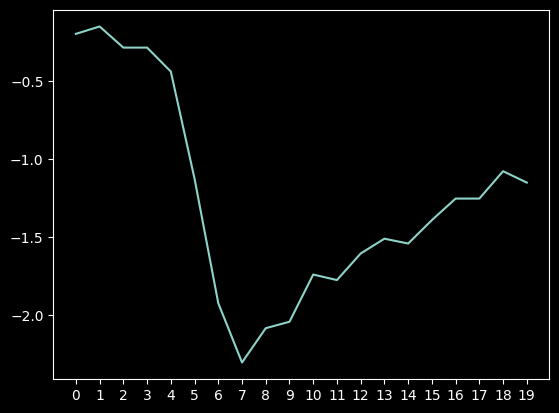

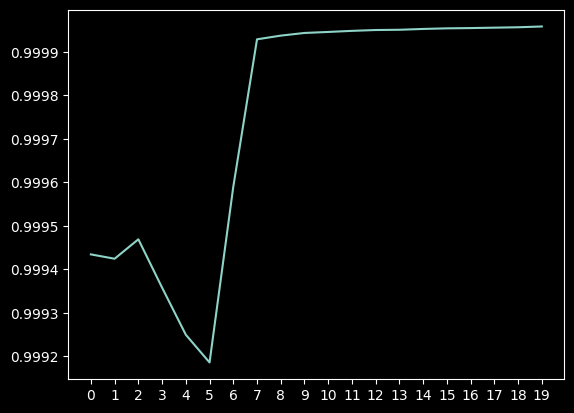

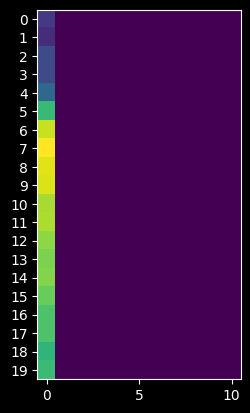

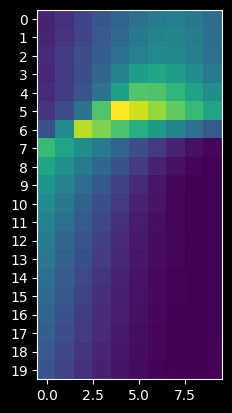

In [13]:
q = 2*spikes[:,0] / (spikes[:,0] + np.sum(spikes[:,1:] - 1))
plt.plot(range(spikes.shape[0]), q)
plt.xticks(range(20))
plt.show()

spikes_known = delays[:,0] / 10 * 100
spikes_unknown = delays[:,1:] / (10*100 * 10)
q = 2*spikes_known / (spikes_known + np.sum(spikes_unknown, axis=1)) - 1
plt.plot(range(delays.shape[0]), q)
plt.xticks(range(20))
plt.show()

plt.imshow(spikes)
plt.yticks(range(20))
plt.show()

plt.imshow(delays)
plt.yticks(range(20))
plt.show()

In [14]:
import numpy as np
a = np.array([105, 57,  21,  39,  53,  69,  16,  40,  52,  23,  67, 14])
105 / np.sum(a)
b = []
for i in a:
    b.append(105 / (i + 105))
np.array(b).round(2)

array([0.5 , 0.65, 0.83, 0.73, 0.66, 0.6 , 0.87, 0.72, 0.67, 0.82, 0.61,
       0.88])